SETUP


In [6]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score
from sklearn.decomposition import PCA
from sklearn import metrics

data = arff.loadarff('../data/column_diagnosis.arff')
df = pd.DataFrame(data[0])

x = df.drop('class', axis=1)
y = df['class'].astype(str)

scaler = MinMaxScaler()

scaler.fit(x)
X = scaler.transform(x)


In [7]:
Using sklearn, apply k-means clustering fully unsupervisedly on the normalized data with
𝑘 ∈ {2,3,4,5} (random=0 and remaining parameters as default). Assess the silhouette and purity of
the produced solutions.


SyntaxError: invalid syntax (3596156226.py, line 1)

In [ ]:
k_values = [2,3,4,5]
silhouettes = []
purities = []

def purity_score(y_true, y_pred):
    confusion_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)
    
for k in k_values:
    km = KMeans(n_clusters=k, random_state=0)
    labels = km.fit_predict(X)

    silhouettes.append(silhouette_score(X, labels))
    purities.append(purity_score(y, labels))
    
results_df = pd.DataFrame({'k': k_values, 'Silhouette Score': silhouettes, 'Purity': purities})
print(results_df)

/home/tomhoq/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/tomhoq/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   k  Silhouette Score    Purity
0  2          0.360441  0.632258
1  3          0.295791  0.667742
2  4          0.274424  0.661290
3  5          0.238239  0.677419


/home/tomhoq/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/tomhoq/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
Consider the application of PCA after the data normalization:
i. Identify the variability explained by the top two principal components.

In [15]:
pca = PCA(n_components=2)
pca.fit(X)

explained_variance = pca.explained_variance_ratio_

print("Variability of 1st principal component:", round(explained_variance[0], 5))
print("Variability of 2nd principal component:", round(explained_variance[1], 5))

Variability of 1st principal component: 0.56181
Variability of 2nd principal component: 0.20956


In [ ]:
ii. For each one of these two components, sort the input variables by relevance by
inspecting the absolute weights of the linear projection.

In [14]:
pca = PCA(n_components=2)

pca.fit(X)

loadings = abs(pca.components_)
print(loadings)
#Getting the index of the sorted weights
sorted_vars_pc1 = np.argsort(loadings[0])[::-1]
sorted_vars_pc2 = np.argsort(loadings[1])[::-1]

# Print the sorted variables for each component
print("Sorted Variables for the 1st Principal Component:")
for idx in sorted_vars_pc1:
    print(f"Variable n{idx+1}: {x.columns[idx]} (Weights: {loadings[0][idx]:.5f})")

print("\nSorted Variables for the 2nd Principal Component:")
for idx in sorted_vars_pc2:
    print(f"Variable n{idx+1}: {x.columns[idx]} (Weights: {loadings[1][idx]:.5f})")

[[0.59162062 0.46703944 0.51508476 0.32568886 0.11582398 0.21692963]
 [0.10003707 0.67037276 0.08004745 0.44330299 0.58107384 0.00458291]]
Sorted Variables for the 1st Principal Component:
Variable n1: pelvic_incidence (Weights: 0.59162)
Variable n3: lumbar_lordosis_angle (Weights: 0.51508)
Variable n2: pelvic_tilt (Weights: 0.46704)
Variable n4: sacral_slope (Weights: 0.32569)
Variable n6: degree_spondylolisthesis (Weights: 0.21693)
Variable n5: pelvic_radius (Weights: 0.11582)

Sorted Variables for the 2nd Principal Component:
Variable n2: pelvic_tilt (Weights: 0.67037)
Variable n5: pelvic_radius (Weights: 0.58107)
Variable n4: sacral_slope (Weights: 0.44330)
Variable n1: pelvic_incidence (Weights: 0.10004)
Variable n3: lumbar_lordosis_angle (Weights: 0.08005)
Variable n6: degree_spondylolisthesis (Weights: 0.00458)


In [ ]:
3) [2v] Visualize side-by-side the data using: i) the ground diagnoses, and ii) the previously learned
𝑘 = 3 clustering solution. To this end, projected the normalized data onto a 2-dimensional data
space using PCA and then color observations using the reference and cluster annotations

/home/tomhoq/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_28319/3370336922.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_projected[y == label, 0], X_projected[y == label, 1], c=col, label=label, cmap='viridis')
/tmp/ipykernel_28319/3370336922.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_projected[labels == cluster, 0], X_projected[labels == cluster, 1], label=f'Cluster {cluster + 1}', cmap='viridis')


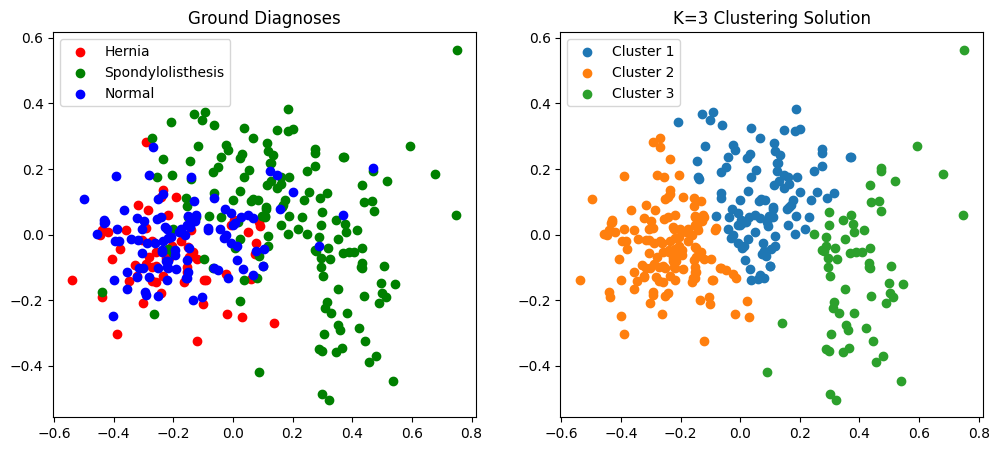

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have already defined X, y, and k3 as in your code.

# Fit PCA and reduce dimensionality
pca = PCA(n_components=2)
X_projected = pca.fit_transform(X)

# KMEANS, k=3
labels = k3.fit_predict(X_projected)

plt.figure(figsize=(12, 5))

# Create a list of colors corresponding to class labels
colors = []
for value in y:
    if value == "Hernia":
        colors.append("red")
    elif value == "Spondylolisthesis":
        colors.append("green")
    elif value == "Normal":
        colors.append("blue")

# Subplot for ground diagnoses
plt.subplot(1, 2, 1)
for label, col in zip(["Hernia", "Spondylolisthesis", "Normal"], ["red", "green", "blue"]):
    plt.scatter(X_projected[y == label, 0], X_projected[y == label, 1], c=col, label=label, cmap='viridis')
plt.title("Ground Diagnoses")
plt.legend()

# Subplot for the k=3 clustering solution
plt.subplot(1, 2, 2)
for cluster in range(3):
    plt.scatter(X_projected[labels == cluster, 0], X_projected[labels == cluster, 1], label=f'Cluster {cluster + 1}', cmap='viridis')
plt.title("K=3 Clustering Solution")
plt.legend()

plt.show()


In [ ]:
4) [1v] Considering the results from questions (1) and (3), identify two ways on how clustering can
be used to characterize the population of ill and healthy individuals